# **In this code, we will implement the developed and adopted ANN model to predict OPTINOAL SAMPLES**





# **Package Import**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#DEFINE PACKAGES IMPORT
import os
import sys
import random
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.metrics import mean_squared_error
from math import sqrt
import csv
random.seed(2)
random_state = 2

**First step: Data loading**

In [15]:
# Data loading
path = '/content/drive/MyDrive/Fatone_Water/'   # for reminding whta was the path
Pred_xls          = pd.ExcelFile(path+'Data for prediction.xlsx')
OutputName        = input('please enter the NAME of the output(BOD,COD,TSS) = ')
InputNum          = int(input('please enter the NUMBER of input parameters(6 OR 11) = '))

PredData = pd.read_excel(Pred_xls,0,header=1)      

if OutputName.lower() == 'BOD'.lower(): #.lower() converts the uppercase characters into lowercase
   Output_num=1
elif OutputName.lower() == 'COD'.lower():
   Output_num=2;
elif OutputName.lower() == 'TSS'.lower():
   Output_num=3;

if InputNum == 11:
   X_Pred = PredData.iloc[:,0:-3] 
elif InputNum == 6:
   X_Pred = PredData.iloc[:,[0,1,4,5,6,7]]
   
index = Output_num -3  
Y_Pred = PredData.iloc[:,index-1]

please enter the NAME of the output(BOD,COD,TSS) = BOD
please enter the NUMBER of input parameters(6 OR 11) = 6


In [16]:
X_Pred

,Influent Flow (t),Influent pH(t),Biofor DN Temperature (t+1),Biofor CN - Dissolved oxygen (t+2),Effluent Flow (t+4),Effluent pH (t+4)
0,99286.87003,7.730003,24.3907,4.795030,87171.30790,6.996148
1,100365.94200,7.729933,24.1695,4.926313,83430.10958,6.996303
2,98026.36921,7.729999,23.6718,5.030749,81897.06456,6.995678
3,93564.30887,7.729997,23.6534,5.125150,82798.26232,6.994478
4,88666.62790,7.730013,23.5880,5.185821,85486.21702,6.992929
...,...,...,...,...,...,...
768,89828.04675,7.799989,24.9283,5.969281,78724.24975,7.104006
769,90804.31814,7.799977,25.0071,6.011194,75339.46647,7.103651
770,88687.63083,7.799985,25.0437,6.072364,73952.47100,7.102411
771,84650.66034,7.799953,25.0474,6.136012,74767.81380,7.100577


In [17]:
Y_Pred

0      4.132170
1      4.059229
2      4.027471
3      4.044143
4      4.099901
         ...   
768    3.458701
769    3.411018
770    3.383006
771    3.383161
772    3.402263
Name: Effluent BOD (t+4), Length: 773, dtype: float64

In [19]:
# Save the inputs and Target of Pred DATA in a folder
pd.DataFrame(X_Pred).to_excel(path +'ANN Predictive model/'+ OutputName +'_'+str(InputNum)+' inputs/Inputs.xlsx')
pd.DataFrame(Y_Pred).to_excel(path +'ANN Predictive model/'+ OutputName +'_'+str(InputNum)+' inputs/Target.xlsx')

In [20]:
#SPLIT AND SCALE DATA
# Transform
ss = StandardScaler()
ss.fit(X_Pred)   # This line: use the train inputs mean and std to make all the data standard
X_Pred_scaled = ss.transform(X_Pred)


# Saving extracted data
X_Pred.to_excel(path +'ANN Predictive model/'+ OutputName +'_'+str(InputNum)+' inputs/X_Pred.xlsx')
Y_Pred.to_excel(path +'ANN Predictive model/'+ OutputName +'_'+str(InputNum)+' inputs/Y_Pred.xlsx')
pd.DataFrame(X_Pred_scaled).to_excel(path +'ANN Predictive model/'+ OutputName +'_'+str(InputNum)+' inputs/X_Pred_scaled.xlsx')


# **Domain Adoptation**

# Recalling the developed ANN (considering output name and input numbers)

# Domain Adoptation (Re-traing the ANN using Pred data)

In [23]:
from tensorflow.keras.models import load_model
Prediction_ANN_model = load_model(path +'Domain-Adoptation Results/'+ OutputName +'_'+str(InputNum)+' inputs/ANN_New_'+OutputName+'_'+ str(InputNum)+' Inputs')


# **Evaluating the accuracy of the developed ANN network for train, validation, and test dataset**
We have Inputs (11 inputs or 6 inputs) and Outputs (BOD, COD, or TSS)



In [24]:
# Evaluating the ANN accuracy for train outputs
Y_Pred_ANN = Prediction_ANN_model.predict(X_Pred_scaled).flatten()

# Save the ANN predictions into the folder 
pd.DataFrame(Y_Pred_ANN).to_excel(path +'ANN Predictive model/'+ OutputName +'_'+str(InputNum)+' inputs/Y_Pred_ANN.xlsx')



CC_Pred    = pearsonr(Y_Pred,Y_Pred_ANN)   #it should be the same thing of MATLAB 'corr' 
RMSE_Pred  = sqrt(mean_squared_error(Y_Pred,Y_Pred_ANN))
SI_Pred    = sqrt(mean_squared_error(Y_Pred,Y_Pred_ANN))/np.mean(Y_Pred)
BIAS_Pred  = np.sum(Y_Pred_ANN - Y_Pred)/Y_Pred.shape[0]



# Writting the results in an Excel file
s = f"""
{'-'*40}
# Full data set set (train-validation-test)
# CC: {CC_Pred}
# RMSE: {RMSE_Pred}
# SI: {SI_Pred}
# BIAS: {BIAS_Pred}
{'-'*40}
"""
print(s)


----------------------------------------
# Full data set set (train-validation-test)
# CC: (0.985095159035318, 0.0)
# RMSE: 0.09499912390059688
# SI: 0.02418439513015217
# BIAS: -0.02064517713665458
----------------------------------------



# **Plotting the ANN predictions for Pred train, validation, and test datasets**

For to better display, we sorted the datasets from small to large

No handles with labels found to put in legend.


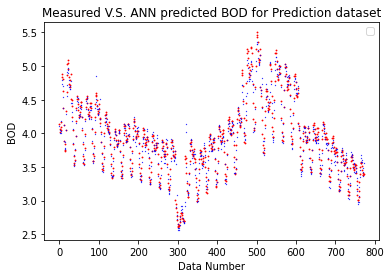

In [26]:
# Time Series Plot for measured and predicted output
plt.figure()
plt.plot(Y_Pred, 'ro',markersize=2, markevery=1, marker='h', markeredgecolor='black', markeredgewidth=0.0)
Ali = pd.Series(Y_Pred_ANN)
Ali.index = Y_Pred.index
plt.plot(Ali, 'b*',markersize=2, markevery=1, marker='*', markeredgecolor='black', markeredgewidth=0.0,linewidth=1)

plt.title('Measured V.S. ANN predicted '+OutputName+ ' for Prediction dataset')
plt.legend()
plt.xlabel("Data Number")
plt.ylabel(OutputName)
plt.savefig(path +'ANN Predictive model/'+ OutputName +'_'+str(InputNum)+' inputs/Time series full Data.tif', format='tif', dpi=300)

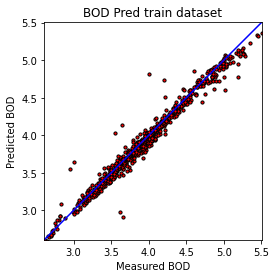

In [28]:
# Scatter Plot for measured and predicted output
plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(Y_Pred, Y_Pred_ANN,color='red',marker= 'o',s=10,edgecolor='black',alpha=None,linewidth=1)
plt.xlabel('Measured '+OutputName)
plt.ylabel('Predicted '+OutputName)
lims = [Y_Pred.min(), Y_Pred.max()]
plt.xlim(lims)
plt.ylim(lims)
plt.title(OutputName+ ' Pred train dataset')
_ = plt.plot(lims, lims,color='blue')
plt.savefig(path +'ANN Predictive model/'+ OutputName +'_'+str(InputNum)+' inputs/Scatter plot train Data.tif', format='tif', dpi=300)